In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def S21_complex(f, f0, k, amp, phi):
    """Asymmetric complex S21 model (no delay)"""
    return amp * np.exp(1j * phi) / (1 + 1j * 2 * (f - f0) / k)

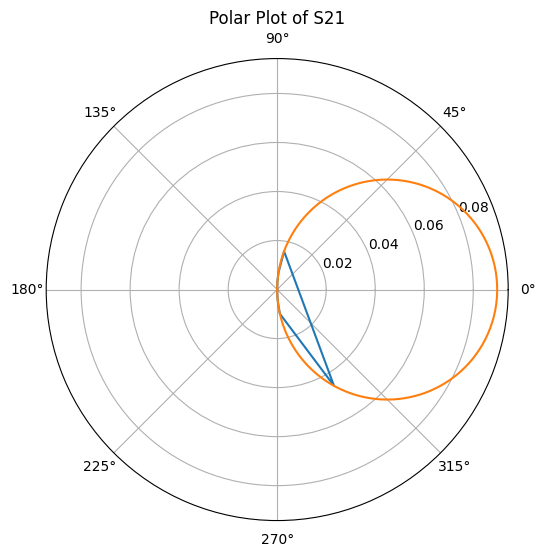

In [125]:


f0 = 6.133e9
freq = np.linspace(4e9, 8e9, 400)  #
freq2 = np.linspace(4e9, 8e9, 200000)  #
k = 2.760e6
amp = 8.976e-2
phi = 0.748

# Compute complex S21 values
s21_vals = np.array([S21_complex(f, f0, k, amp, 0) for f in freq])
s21_vals2 = np.array([S21_complex(f, f0, k, amp, 0) for f in freq2])
# Plot polar
plt.figure(figsize=(6,6))
plt.polar(np.angle(s21_vals), np.abs(s21_vals))
plt.polar(np.angle(s21_vals2), np.abs(s21_vals2))
plt.title("Polar Plot of S21")
plt.show()

In [ ]:
def generate_f_new(k, n):
    """
    Generate array f_new = (k/2) * tan(theta)
    where theta goes from pi/2 to -pi/2 in n intervals.
    """
    # Avoid exact ±π/2 to prevent tan(±π/2) → ∞
    epsilon = 1e-6
    theta = np.linspace(np.pi/2 - epsilon, -np.pi/2 + epsilon, n)
    f_new = f0+ (2/ k) * np.tan(theta)
    f_new = f_new[(f_new <= 20 * f0) & (f_new >= f0 / 20)]

    return f_new


In [203]:
k = 2.760e6
n = 15
f_new = generate_f_new(k, n)

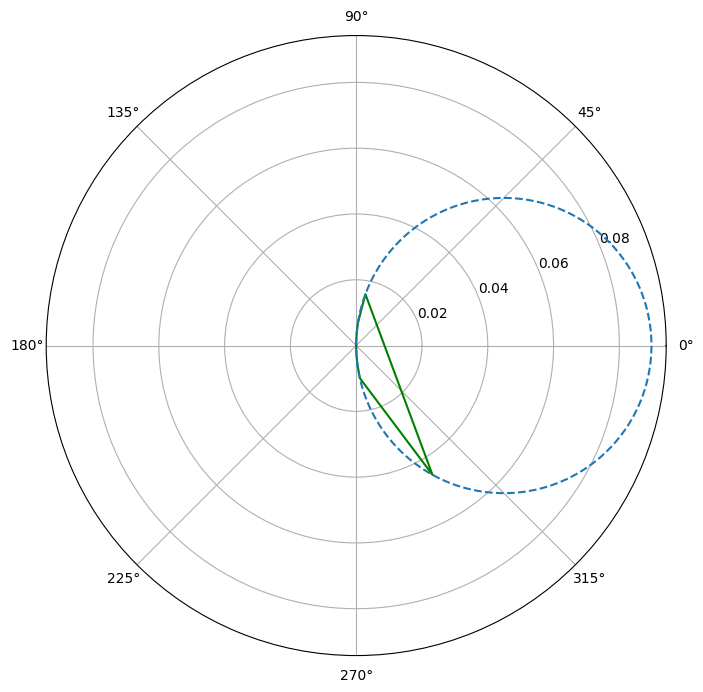

In [204]:
s21_vals3 = np.array([S21_complex(f, f0, k, amp, 0) for f in f_new])
plt.figure(figsize=(8,10))
plt.polar(np.angle(s21_vals), np.abs(s21_vals), color = "green")
plt.polar(np.angle(s21_vals2), np.abs(s21_vals2),linestyle = "--")
# plt.polar(np.angle(s21_vals3), np.abs(s21_vals3))

In [205]:
print(n)

15


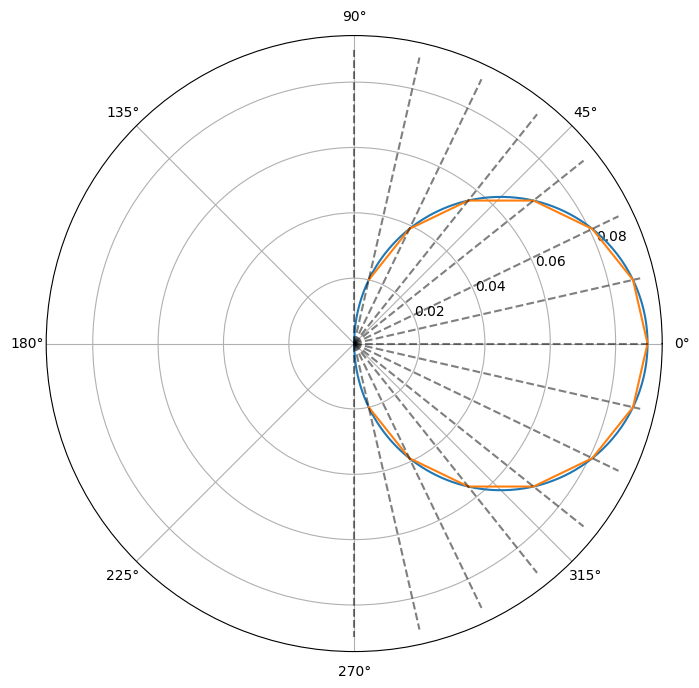

In [206]:

plt.figure(figsize=(8,8))
# plt.polar(np.angle(s21_vals), np.abs(s21_vals))
plt.polar(np.angle(s21_vals2), np.abs(s21_vals2),linestyle = "-")
plt.polar(np.angle(s21_vals3), np.abs(s21_vals3))

thetas = np.linspace(-np.pi/2 + 1e-6,np.pi/2 - 1e-6, n)
# thetas_deg = np.degrees(thetas)

r = np.linspace(0, amp, 100)
for theta in thetas:
    plt.polar(np.full_like(r, theta), r, linestyle='--', color='black',alpha =0.5)

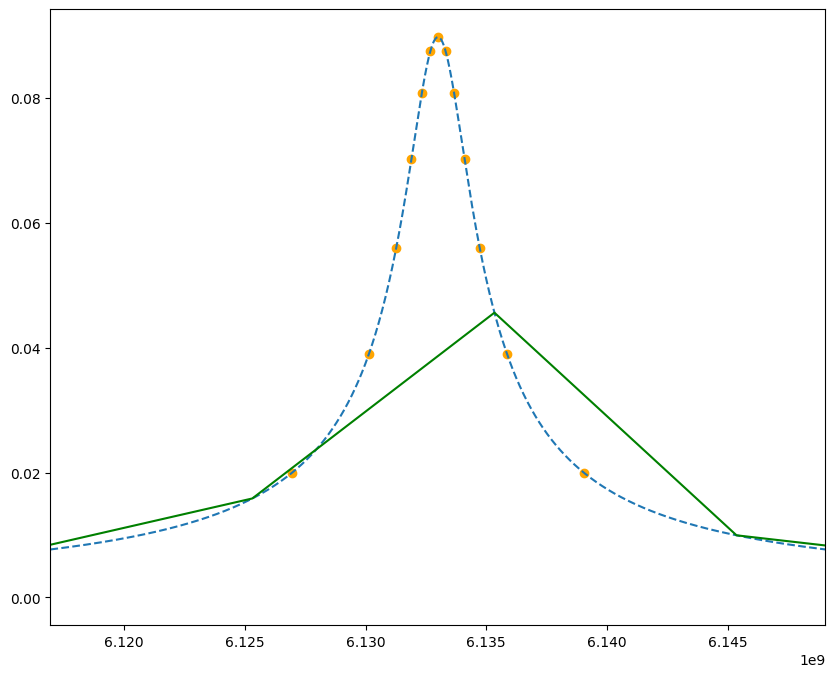

In [207]:
plt.figure(figsize=(10,8))
plt.plot(freq2,np.abs(s21_vals2),linestyle = "--")
plt.plot(freq,np.abs(s21_vals),color="g")
plt.xlim(f_new[-1]-0.01e9, f_new[0]+0.01e9)

plt.scatter(f_new,np.abs(s21_vals3),color="orange")
# print(f_new)

In [208]:
for i in range(len(f_new)-1):
    print(abs(f_new[i]-f_new[i+1])/1e6)

3.180556869474411
1.135131053779602
0.6299509283399581
0.4359398208742142
0.34959670098209383
0.3149757872457504
0.3149757872457504
0.34959670098209383
0.4359398208742142
0.6299509283399581
1.135131053779602
3.180556869474411
